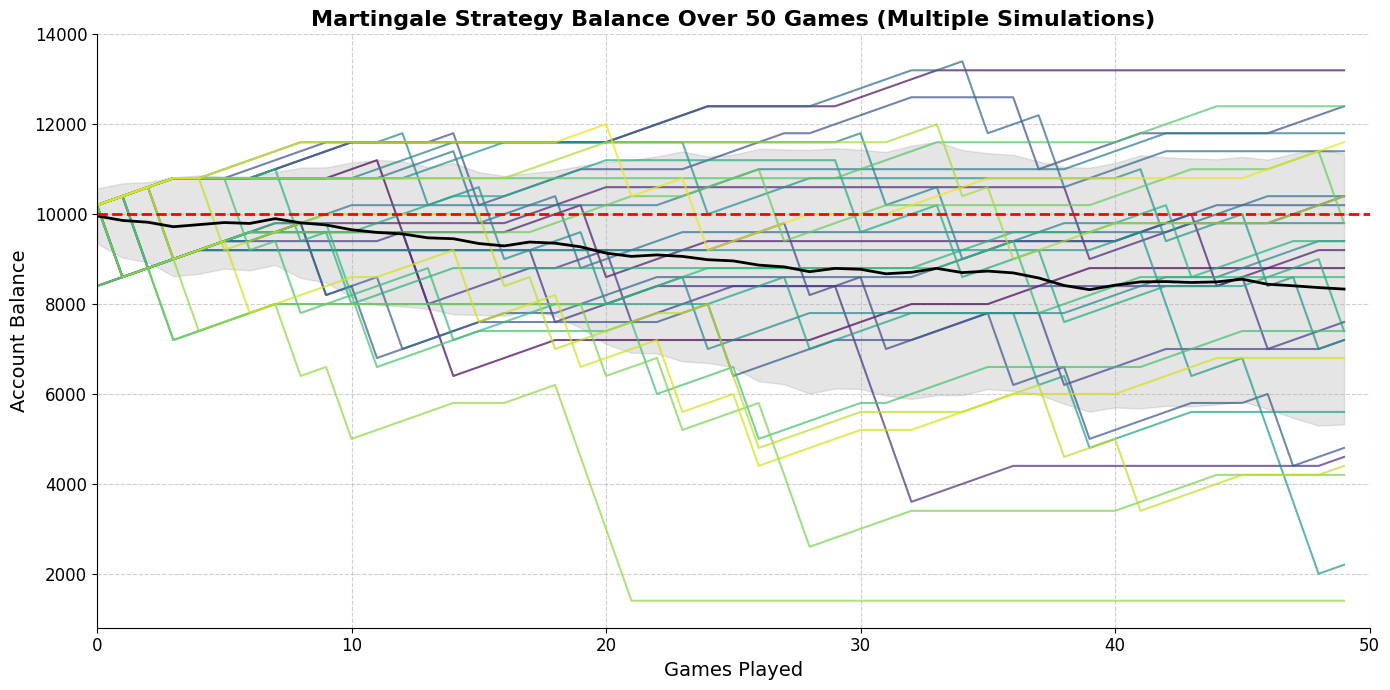

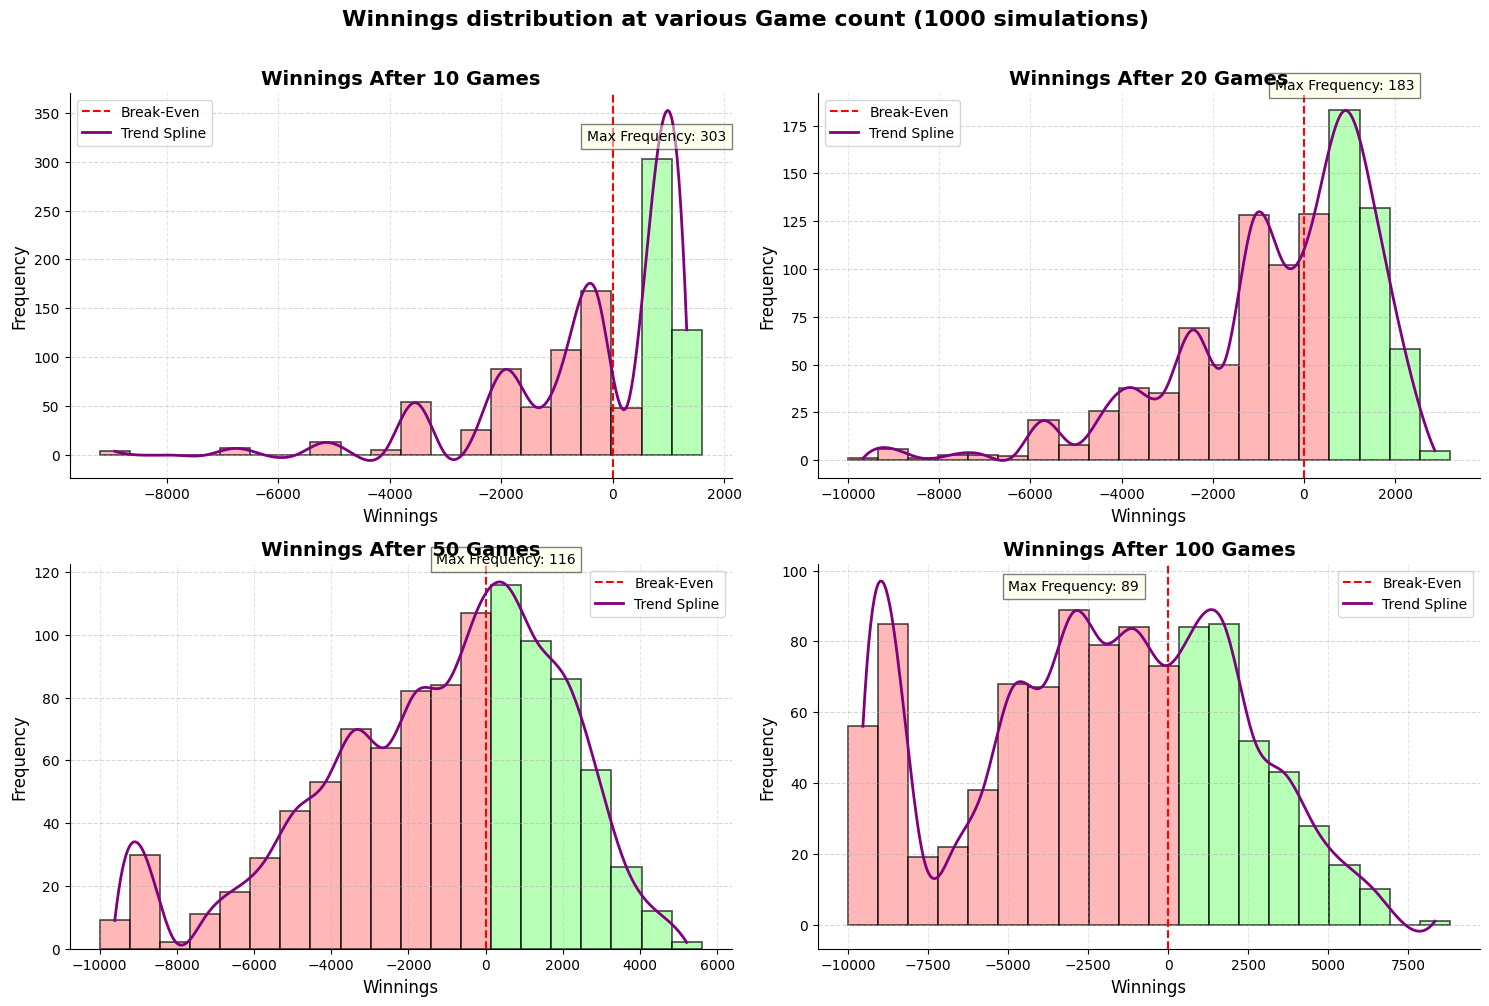

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def romanovsky_strategy(starting_balance, games):
    """
    Simulates the Romanovsky strategy for a given number of games.

    Args:
        starting_balance (int): The initial balance.
        games (int): The number of games to simulate.

    Returns:
        list: A list of account balances after each game.
    """
    balance = starting_balance
    base_bet = 200  # Initial bet
    bet = base_bet * 8
    results = []

    safe_strategy = True

    if safe_strategy:
        winning_streak = 0
        stop = False
        for game in range(games):
            if balance < bet:
                results.append(balance)
                break

            result = np.random.rand() < 32/37 #Winning Probability in Romanovsky

            
            if result == 1:
                if stop == False:
                    winning_streak += 1
                    balance += bet / 8
                    if winning_streak >= 4:
                        stop = True
                        winning_streak = 0
                else:
                    pass
            else:
                if stop == False:
                    winning_streak = 0
                    balance -= bet
                else:
                    stop = False
                    winning_streak = 0

            results.append(balance)
    else:
        for game in range(games):
            if balance < bet:
                results.append(balance)
                break

            result = np.random.rand() < 32/37 #Winning Probability in Romanovsky

            if result == 1:
                balance += bet / 8
            else:
                balance -= bet

            results.append(balance)

    return results

def simulate_romanovsky(starting_balance, num_simulations, games):
    """
    Simulates the Romanovsky strategy multiple times.

    Args:
        starting_balance (int): The initial balance.
        num_simulations (int): The number of simulations to run.
        games (int): The number of games to simulate in each simulation.

    Returns:
        list: A list of lists, where each inner list represents the results of a simulation.
    """
    all_histories = []
    for _ in range(num_simulations):
        results = romanovsky_strategy(starting_balance, games)
        all_histories.append(results)

    return all_histories

def plot_histograms(histories, game_counts):
    """
    Plots histograms of winnings at specified intervals.

    Args:
        all_histories (list): A list of simulation results.
        intervals (list): A list of game intervals to plot histograms for.
    """

    num_plots = len(game_counts)
    num_rows = int(num_plots/2 + 1)
    num_cols = 2

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

    for i, num_games in enumerate(game_counts):
        plt.subplot(num_rows, num_cols, i + 1)
        winnings = [history[min(num_games - 1, len(history) - 1)] - 10000 for history in histories]

        # --- Enhanced Histogram Styling ---
        n, bins, patches = plt.hist(winnings, bins=20, alpha=0.7, edgecolor='black', linewidth=1.2, color='#607c8e')  # Added edgecolor, linewidth, and a custom color

        # Color the bars conditionally
        for patch, left, right in zip(patches, bins[:-1], bins[1:]):
            if left < 0:
                patch.set_facecolor('#ff9999')  # Light red
            else:
                patch.set_facecolor('#99ff99')  # Light green
        
        # Add a vertical line at zero to denote the break-even point
        plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='Break-Even')

        # Add a subtle grid
        plt.grid(axis='y', alpha=0.5, linestyle='--')
        plt.grid(axis='x', alpha=0.3, linestyle='--')

        # Fit a spline to the histogram data
        bin_centers = (bins[:-1] + bins[1:]) / 2
        spline = UnivariateSpline(bin_centers, n, s=3)
        xs = np.linspace(bin_centers.min(), bin_centers.max(), 300)
        plt.plot(xs, spline(xs), color='purple', linestyle='-', linewidth=2, label='Trend Spline')

        # Find the maximum frequency and add a text box
        max_frequency_index = np.argmax(n)
        max_frequency_value = int(n[max_frequency_index])
        max_frequency_bin_center = (bins[max_frequency_index] + bins[max_frequency_index+1])/2

        # Format the box
        plt.text(max_frequency_bin_center,max_frequency_value + max_frequency_value/20, f'Max Frequency: {max_frequency_value}', ha='center', va='bottom', bbox=dict(facecolor='lightyellow', alpha=0.5))

        plt.title(f'Winnings After {num_games} Games', fontsize=14, fontweight='bold')
        plt.xlabel('Winnings', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend()

        # Remove top and right spines for a cleaner look
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout and add space for suptitle
    plt.suptitle("Winnings distribution at various Game count (1000 simulations)", fontsize=16, fontweight='bold')
    plt.show()

def plot_balance_histories(histories, num_games):
    """
    Plots the account balance over a specified number of games for multiple simulations,
    with enhanced styling and clarity.

    Args:
        histories: A list of lists, where each inner list represents the balance history for a single simulation.
        num_games: The total number of games played in each simulation.
    """

    plt.figure(figsize=(14, 7))  # Slightly wider figure for better visualization

    # --- Enhanced Styling and Plotting ---
    
    # Fix: Ensure all histories have the same length by padding shorter ones before plotting
    max_len = max(len(h) for h in histories)
    padded_histories = [np.pad(h, (0, max_len - len(h)), mode='edge') for h in histories]

    for i, history in enumerate(padded_histories):
        # Use semi-transparent lines with varying shades for each simulation
        color = plt.cm.viridis(i / len(histories))  # Colormap for varying shades
        plt.plot(history, color=color, alpha=0.7, linewidth=1.5, label=f'Simulation {i+1}')

    
    #Calculate mean and std
    all_balances = np.array(padded_histories)
    mean_balances = np.mean(all_balances, axis=0)
    std_balances = np.std(all_balances, axis=0)

    #Fix to avoid error
    min_length = min(len(mean_balances), num_games + 1)
    x_values = range(min_length)
    mean_balances = mean_balances[:min_length]
    std_balances = std_balances[:min_length]
    #Fill between standard deviation
    plt.fill_between(x_values, mean_balances - std_balances, mean_balances + std_balances, alpha=0.2, color='gray', label="Std")
    
    #Plot the mean
    plt.plot(x_values,mean_balances, color='black', linewidth=2, linestyle='-', label="Mean")

    # Add a horizontal line at starting balance
    plt.axhline(y=10000, color='red', linestyle='--', linewidth=2, label='Starting Balance')

    # Add a subtle grid
    plt.grid(True, which='both', linestyle='--', alpha=0.6)

    # Set plot title and labels
    plt.title(f'Martingale Strategy Balance Over {num_games} Games (Multiple Simulations)', fontsize=16, fontweight='bold')
    plt.xlabel('Games Played', fontsize=14)
    plt.ylabel('Account Balance', fontsize=14)

    # Customize tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust plot limits
    plt.xlim(0, num_games)

    # Add legend
    # plt.legend(loc='upper left')

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

if __name__ == "__main__":
    starting_balance = 10000
    num_simulations = 30
    games = 50

    all_histories = simulate_romanovsky(starting_balance, num_simulations, games)
    plot_balance_histories(all_histories, games)

    num_simulations = 1000
    games = 100

    all_histories = simulate_romanovsky(starting_balance, num_simulations, games)

    game_counts = [10, 20, 50, 100]
    plot_histograms(all_histories, game_counts)
    

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Simulation parameters
simulations = 10000
starting_balance = 10000
num_games_list = range(1, 30, 1)
percentage_success_list = []

# Simulate the Martingale strategy
for num_games in num_games_list:
    all_histories = simulate_romanovsky(starting_balance, simulations, num_games)
    winnings = [history[-1] - starting_balance for history in all_histories]
    successful_simulations = sum(1 for win in winnings if win >= 0)
    percentage_successful = (successful_simulations / simulations) * 100
    percentage_success_list.append(percentage_successful)

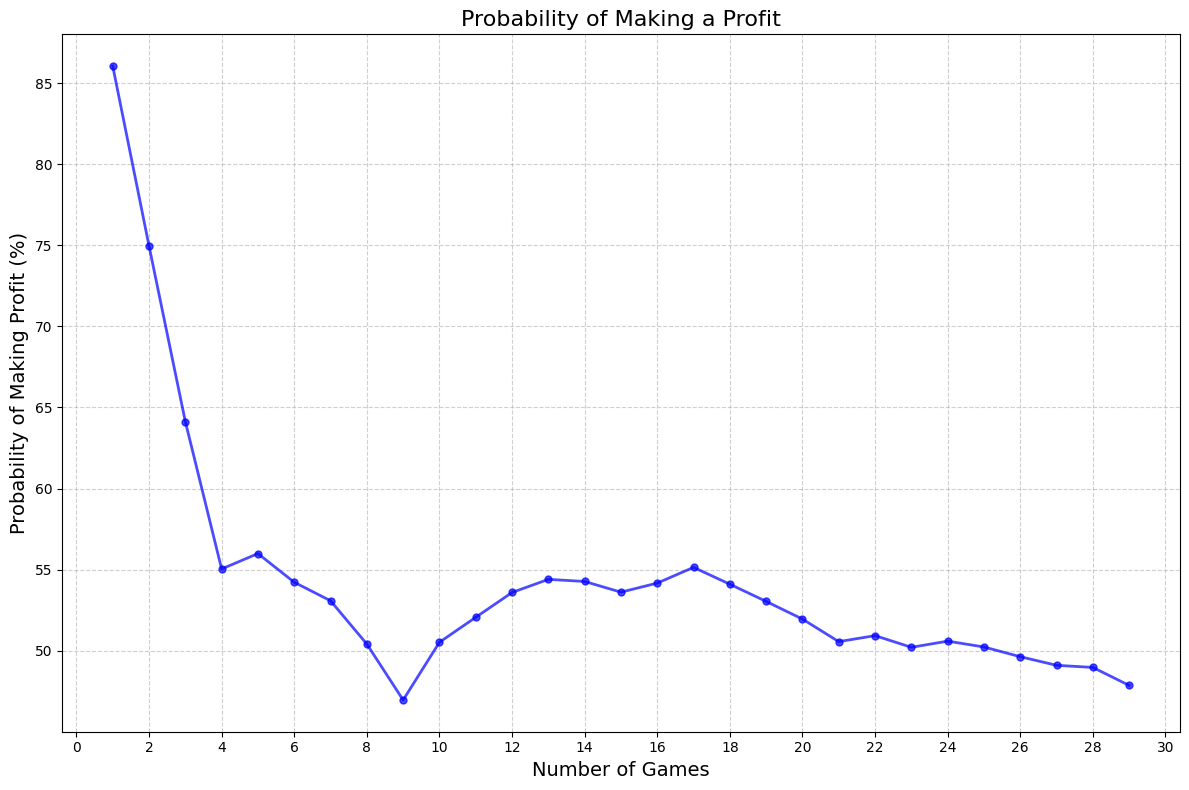

In [13]:
# # Smooth the data using a uniform filter
# smoothed_percentage_success_list = uniform_filter1d(percentage_success_list, size=10)

# Plot the smoothed data
plt.figure(figsize=(12, 8))
plt.plot(num_games_list, percentage_success_list, color='blue', linestyle='-', marker = 'o', linewidth=2, markersize=5, alpha=0.7)
plt.title('Probability of Making a Profit', fontsize=16)
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Probability of Making Profit (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, 31, 2))
plt.tight_layout()
plt.show()